# step 1 load dataset

In [2]:
from sklearn.datasets import load_breast_cancer
bc = load_breast_cancer()

In [3]:
print(bc.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

# dataset info

In [4]:
bc.target[500]

1

In [5]:
bc.target.shape

(569,)

In [6]:
bc.data[500]

array([1.504e+01, 1.674e+01, 9.873e+01, 6.894e+02, 9.883e-02, 1.364e-01,
       7.721e-02, 6.142e-02, 1.668e-01, 6.869e-02, 3.720e-01, 8.423e-01,
       2.304e+00, 3.484e+01, 4.123e-03, 1.819e-02, 1.996e-02, 1.004e-02,
       1.055e-02, 3.237e-03, 1.676e+01, 2.043e+01, 1.097e+02, 8.569e+02,
       1.135e-01, 2.176e-01, 1.856e-01, 1.018e-01, 2.177e-01, 8.549e-02])

In [7]:
bc.data.shape

(569, 30)

# step 2 pre-processing

In [8]:
from sklearn.model_selection import train_test_split

# x_train, x_test, y_train, y_test = train_test_split(x=feature, y=label, 20% of data )

x_train, x_test, y_train, y_test = train_test_split(bc.data, bc.target, test_size=0.2)

In [9]:
print(f"feature=> train: {x_train.shape} -test: {x_test.shape}")
print(f"label=> test: {y_train.shape} -test: {y_test.shape}")



feature=> train: (455, 30) -test: (114, 30)
label=> test: (455,) -test: (114,)


# step 2.1 normalization

In [10]:
x_train[10]

array([1.625e+01, 1.951e+01, 1.098e+02, 8.158e+02, 1.026e-01, 1.893e-01,
       2.236e-01, 9.194e-02, 2.151e-01, 6.578e-02, 3.147e-01, 9.857e-01,
       3.070e+00, 3.312e+01, 9.197e-03, 5.470e-02, 8.079e-02, 2.215e-02,
       2.773e-02, 6.355e-03, 1.739e+01, 2.305e+01, 1.221e+02, 9.397e+02,
       1.377e-01, 4.462e-01, 5.897e-01, 1.775e-01, 3.318e-01, 9.136e-02])

In [11]:
from sklearn.preprocessing import MinMaxScaler

scalar = MinMaxScaler(feature_range=(0, 1))

x_train = scalar.fit_transform(x_train)
x_test = scalar.transform(x_test)

In [12]:
x_train[10]

array([0.45797717, 0.33141698, 0.47726122, 0.319155  , 0.47643328,
       0.51515716, 0.52389878, 0.45695825, 0.5510101 , 0.33319292,
       0.1454025 , 0.13823815, 0.24703621, 0.11634939, 0.25441071,
       0.39042814, 0.20401515, 0.41958704, 0.27928181, 0.18863922,
       0.37539683, 0.31388731, 0.40074906, 0.23238265, 0.43934491,
       0.40642858, 0.47100639, 0.60996564, 0.3455549 , 0.23822642])

# step 3 classification

In [13]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

def calculate_metrics(y_train, y_test, y_pred_train, y_pred_test):
  acc_train = accuracy_score(y_true=y_train, y_pred=y_pred_train)
  acc_test = accuracy_score(y_true=y_test, y_pred=y_pred_test)

  p = precision_score(y_true=y_test, y_pred=y_pred_test)
  r = recall_score(y_true=y_test, y_pred=y_pred_test)

  print(f"acc train: {acc_train} - acc test: {acc_test} - precision:{p} - recall{r}")

  return acc_train, acc_test, p, r

## 1. Naive bayes model


In [14]:
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()
gnb.fit(x_train, y_train)


GaussianNB()

In [15]:
y_pred_train = gnb.predict(x_train)
y_pred_test = gnb.predict(x_test)

acc_train_gnb, acc_test_gnb, p_gnb, r_gnb = calculate_metrics(y_train, y_test, y_pred_train, y_pred_test)

acc train: 0.9406593406593406 - acc test: 0.9122807017543859 - precision:0.9436619718309859 - recall0.9178082191780822


## 2. KNN model

> Add blockquote




In [16]:
from sklearn.neighbors import KNeighborsClassifier

# tedad hamsaye bala = smooth tar
knn = KNeighborsClassifier(n_neighbors=8, algorithm='kd_tree', leaf_size=28)
knn.fit(x_train, y_train)


KNeighborsClassifier(algorithm='kd_tree', leaf_size=28, n_neighbors=8)

In [17]:
y_pred_train = knn.predict(x_train)
y_pred_test = knn.predict(x_test)

acc_train_knn, acc_test_knn, p_knn, r_knn = calculate_metrics(y_train, y_test, y_pred_train, y_pred_test)

acc train: 0.9802197802197802 - acc test: 0.9736842105263158 - precision:0.972972972972973 - recall0.9863013698630136


## 3. decision_tree model

In [18]:
from sklearn.tree import DecisionTreeClassifier

# dt = DecisionTreeClassifier(max_depth=128, min_samples_split=4, criterion='entropy')
dt = DecisionTreeClassifier(max_depth=64, min_samples_split=2, criterion='gini')
dt.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=64)

In [19]:
y_pred_train = dt.predict(x_train)
y_pred_test = dt.predict(x_test)

acc_train_dt, acc_test_dt, p_dt, r_dt = calculate_metrics(y_train, y_test, y_pred_train, y_pred_test)

acc train: 1.0 - acc test: 0.9473684210526315 - precision:0.958904109589041 - recall0.958904109589041


## 4. Random Forest model

In [20]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=500, max_depth=64, min_samples_split=8)
rf.fit(x_train, y_train)

RandomForestClassifier(max_depth=64, min_samples_split=8, n_estimators=500)

In [21]:
y_pred_train = rf.predict(x_train)
y_pred_test = rf.predict(x_test)

acc_train_rf, acc_test_rf, p_rf, r_rf = calculate_metrics(y_train, y_test, y_pred_train, y_pred_test)

acc train: 0.9934065934065934 - acc test: 0.956140350877193 - precision:0.9722222222222222 - recall0.958904109589041


## 5. SVM model

In [22]:
from sklearn.svm import SVC

# svm = SVC()
svm = SVC(kernel='poly')
svm.fit(x_train, y_train)

SVC(kernel='poly')

In [23]:
y_pred_train = svm.predict(x_train)
y_pred_test = svm.predict(x_test)

acc_train_svm, acc_test_svm, p_svm, r_svm = calculate_metrics(y_train, y_test, y_pred_train, y_pred_test)

acc train: 0.989010989010989 - acc test: 0.9736842105263158 - precision:0.972972972972973 - recall0.9863013698630136


## 6. Logestic Regression

In [24]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(x_train, y_train)

LogisticRegression()

In [25]:
y_pred_train = lr.predict(x_train)
y_pred_test = lr.predict(x_test)

acc_train_lr, acc_test_lr, p_lr, r_lr = calculate_metrics(y_train, y_test, y_pred_train, y_pred_test)

acc train: 0.9692307692307692 - acc test: 0.9649122807017544 - precision:0.948051948051948 - recall1.0


## 7. ANN model


In [26]:
from sklearn.neural_network import MLPClassifier

# ann = MLPClassifier()
# ann = MLPClassifier(hidden_layer_sizes=512, activation='relu', solver='adam', batch_size=64)
ann = MLPClassifier(hidden_layer_sizes=512, activation='relu', solver='adam')
ann.fit(x_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(hidden_layer_sizes=512)

In [27]:
y_pred_train = ann.predict(x_train)
y_pred_test = ann.predict(x_test)

acc_train_ann, acc_test_ann, p_ann, r_ann = calculate_metrics(y_train, y_test, y_pred_train, y_pred_test)

acc train: 0.989010989010989 - acc test: 0.9736842105263158 - precision:0.9861111111111112 - recall0.9726027397260274


## Step 4. Comparasion

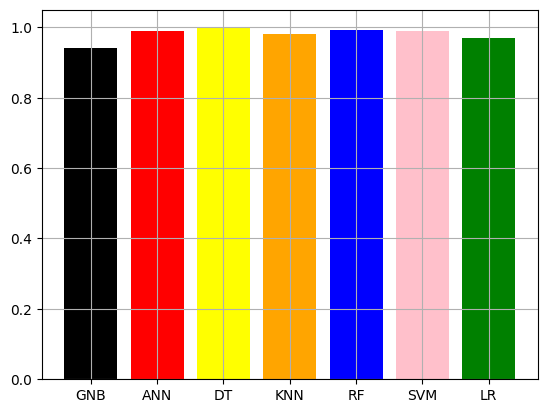

In [37]:
import matplotlib.pyplot as plt

acc_train = [acc_train_gnb, acc_train_ann, acc_train_dt, acc_train_knn, acc_train_rf, acc_train_svm, acc_train_lr]
title = ["GNB", "ANN", "DT", "KNN", "RF", "SVM", "LR"]
colors = ['black','navy','yellow','orange','blue','pink','green','navy']
plt.bar(title, acc_train, color=colors)
plt.grid()
plt.show()

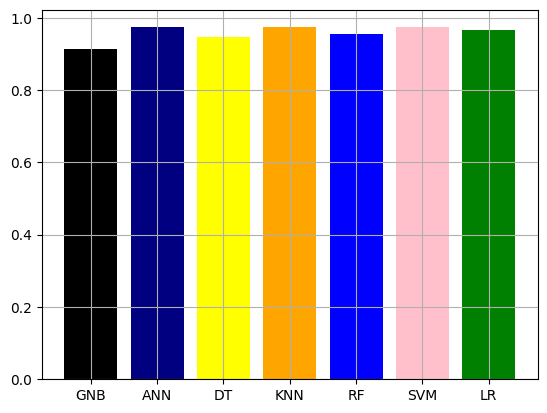

In [39]:
import matplotlib.pyplot as plt

acc_test = [acc_test_gnb, acc_test_ann, acc_test_dt, acc_test_knn, acc_test_rf, acc_test_svm, acc_test_lr]
title = ["GNB", "ANN", "DT", "KNN", "RF", "SVM", "LR"]
colors = ['black','navy','yellow','orange','blue','pink','green','navy']
plt.bar(title, acc_test, color=colors)
plt.grid()
plt.show()

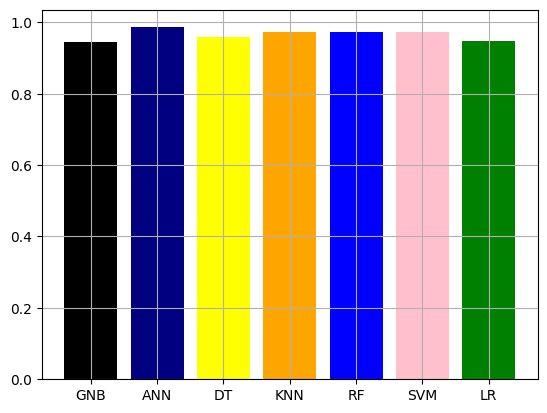

In [40]:
p = [p_gnb, p_ann, p_dt, p_knn, p_rf, p_svm, p_lr]
title = ["GNB", "ANN", "DT", "KNN", "RF", "SVM", "LR"]
colors = ['black','navy','yellow','orange','blue','pink','green','navy']
plt.bar(title, p, color=colors)
plt.grid()
plt.show()

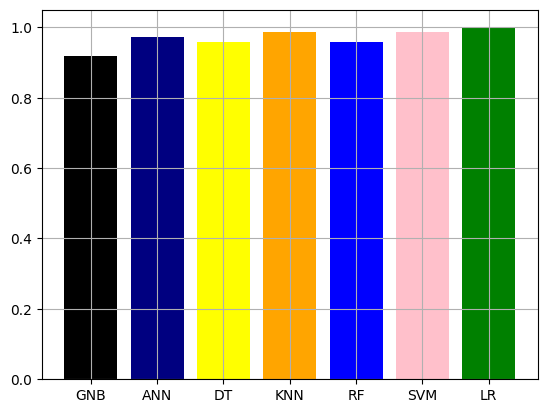

In [49]:
recall = [r_gnb, r_ann, r_dt, r_knn, r_rf, r_svm, r_lr]
title = ["GNB", "ANN", "DT", "KNN", "RF", "SVM", "LR"]
colors = ['black', 'navy', 'yellow', 'orange', 'blue', 'pink', 'green']
plt.bar(title, recall, color=colors)
plt.grid()
plt.show()

## Project number 2. Recognizing numbers from 0 to 9 with their entry images